<a href="https://colab.research.google.com/github/jregio/CSE-5835-Final-Project/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# connect notebook to Google Drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/CSE5835

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/CSE5835


In [ ]:
import pandas as pd

# import potency values and fingerprints
df_pot = pd.read_pickle('df_pot.pkl')
df_fp = pd.read_pickle('df_fp')

,index,canonical_smiles,standard_value
0,0,COC(=O)c1c(-c2cc(OC)c(OC)c(OC)c2)c2ccc(OCc3ccc...,7375.3
1,1,CCC1(O)CC2CN(CCc3c([nH]c4ccccc34)[C@@](C(=O)OC...,116.9
2,2,Cl.Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@@H]2O)c...,11689.1
3,3,COc1ccc2c(c1OC)C(=O)OC2[C@@H]1c2cc3c(cc2CCN1C)...,11689.1
4,4,NC(=O)c1ncn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)n1,18526.0
...,...,...,...
302213,302501,CNc1cc(CSc2ccc(Cl)cc2)nc(C)n1,13115.4
302214,302502,Oc1ccc(/C=N/Nc2nc(N3CCCCCC3)nc(N3CCCCCC3)n2)c(...,414.7
302215,302503,COC(=O)c1ccc(COc2ccc3c(C)c(C)c(=O)oc3c2)o1,18526.0
302216,302504,Br.CCCn1c(=N)n(CC(=O)c2ccc([N+](=O)[O-])cc2)c2...,18526.0


In [ ]:
from matplotlib import pyplot as plt
import numpy as np

# plot histogram
def plotHist(s):
  fig, ax = plt.subplots(figsize=(10,7))
  ax.hist(s, bins=20)

  plt.show()

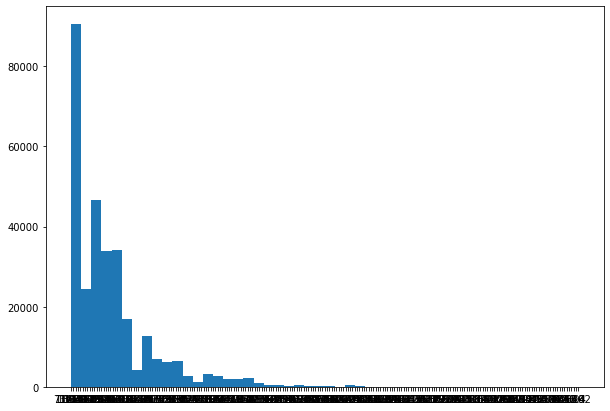

6460.3354074621675

In [ ]:
# histogram shows large range in potency values
potency_vals = pd.to_numeric(df_pot['standard_value'])
plotHist(potency_vals)
potency_vals.describe()

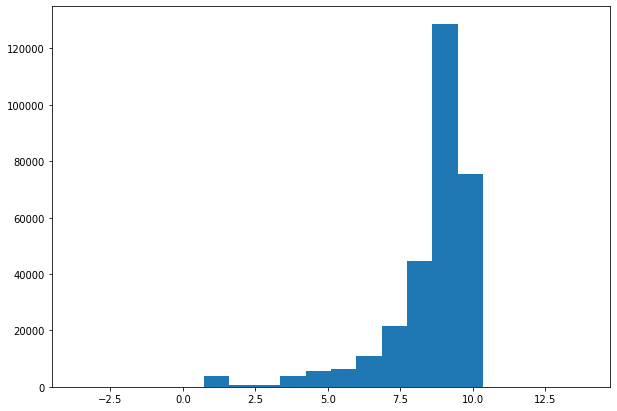

count    302218.000000
mean          8.615668
std           1.583087
min          -3.641996
25%           8.215115
50%           9.251281
75%           9.481542
max          13.856454
Name: standard_value, dtype: float64

In [ ]:
# normalize potency values
a = pd.to_numeric(df_pot['standard_value']).apply(np.log)

# normalized potency values now have less variation
# however, values are skewed to the right
plotHist(a)
a.describe()

In [ ]:
# separate potency values into balanced bins
quantiles = [0, 0.05, 0.10, 0.40, 1.0]  # manually adjusted values
num_quantiles = len(quantiles) - 1
out = pd.qcut(a, q=quantiles, labels=['Bin ' + str(i) for i in range(num_quantiles)])

# gather datapoints into bins
bins = []
for i in range(num_quantiles):
  bins.append(a[out.index[out=='Bin ' + str(i)]])

# bin sizes
out.value_counts()

Bin 3    176556
Bin 2     93688
Bin 1     16705
Bin 0     15269
Name: standard_value, dtype: int64

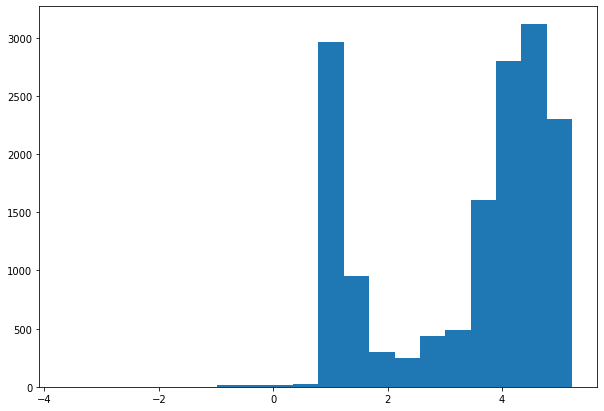

In [ ]:
plotHist(bins[0])

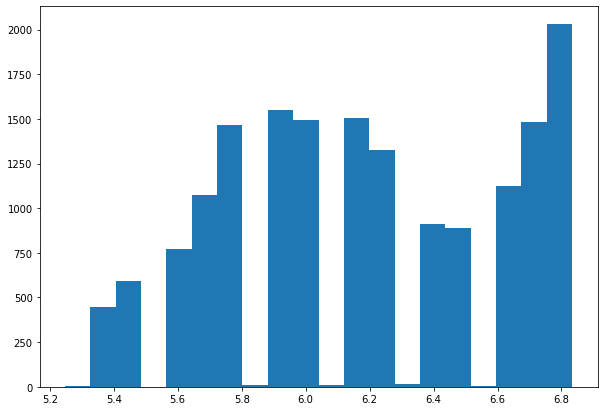

In [ ]:
plotHist(bins[1])

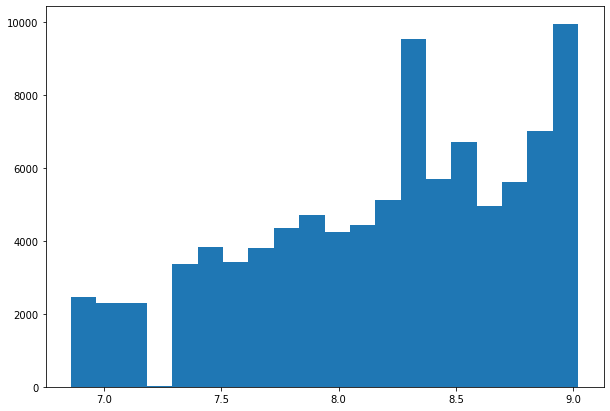

In [ ]:
plotHist(bins[2])

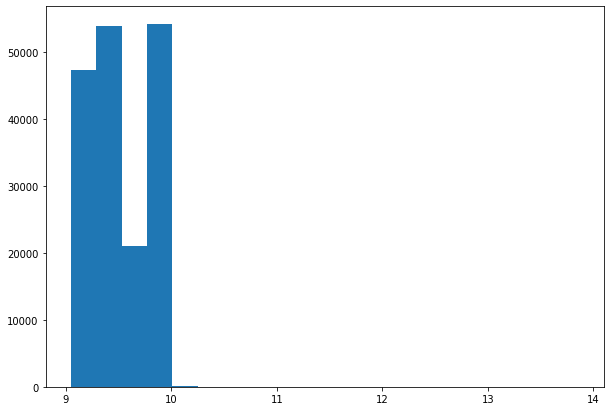

In [ ]:
plotHist(bins[3])

In [ ]:
# combine molecular fingerprint with corresponding potency value
def combine(x, y):
  df = pd.concat([x, y], axis=1, join='inner')

  return df

In [ ]:
# randomly select potency values from a bin (without replacement)
def takeFromBin(bin, n):
  vals = bin.sample(n=n)
  bin.drop(labels=vals.index, inplace=True)

  df = combine(df_fp, vals)

  return df

In [ ]:
# create train, dev, test sets
# goal: balanced dev/test sets

dev_df = pd.DataFrame()
test_df = pd.DataFrame()
train_df = pd.DataFrame()

# how much to take from each bin into dev/test sets
DEV_TAKE = 5000
TEST_TAKE = 5000

# randomly select values from each bin into dev/test sets
# remainder is left for training set
for bin in bins:
  dev_sample = takeFromBin(bin, DEV_TAKE)
  test_sample = takeFromBin(bin, TEST_TAKE)
  train_sample = combine(df_fp, bin)

  dev_df = pd.concat([dev_df, dev_sample], axis=0)
  test_df = pd.concat([test_df, test_sample], axis=0)
  train_df = pd.concat([train_df, train_sample], axis=0)

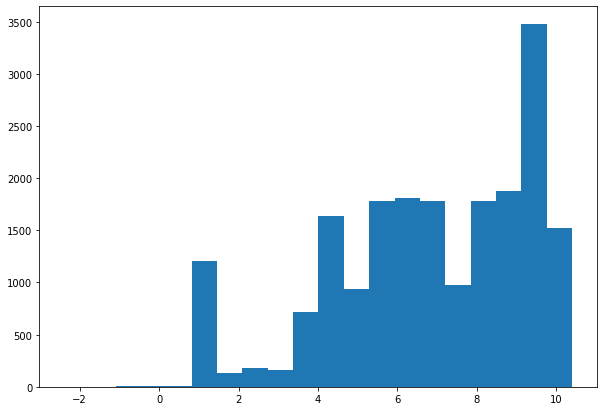

,Bit 0,Bit 1,Bit 2,Bit 3,Bit 4,Bit 5,Bit 6,Bit 7,Bit 8,Bit 9,...,Bit 1015,Bit 1016,Bit 1017,Bit 1018,Bit 1019,Bit 1020,Bit 1021,Bit 1022,Bit 1023,standard_value
73,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3.034953
103,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.839452
141,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.064711
155,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0.955511
164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.955082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301948,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,9.826930
301952,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.826930
302056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,9.251281
302137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.481542


In [ ]:
# histogram shows balanced dev set 
plotHist(dev_df['standard_value'])

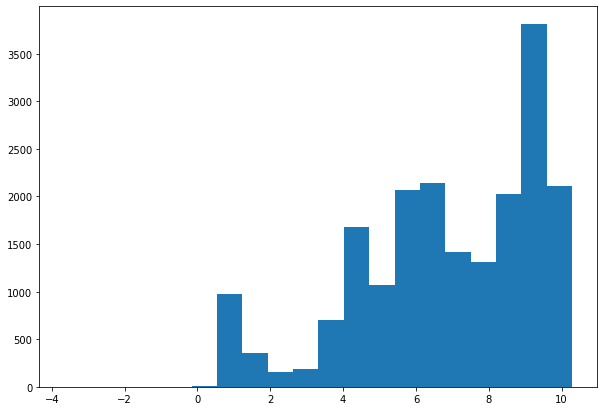

,Bit 0,Bit 1,Bit 2,Bit 3,Bit 4,Bit 5,Bit 6,Bit 7,Bit 8,Bit 9,...,Bit 1015,Bit 1016,Bit 1017,Bit 1018,Bit 1019,Bit 1020,Bit 1021,Bit 1022,Bit 1023,standard_value
56,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.955511
58,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2.116256
111,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.116256
169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.876723
173,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4.530447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302141,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.366412
302155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.826930
302159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.251281
302164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,9.596670


In [ ]:
# histogram shows balanced test set
plotHist(test_df['standard_value'])

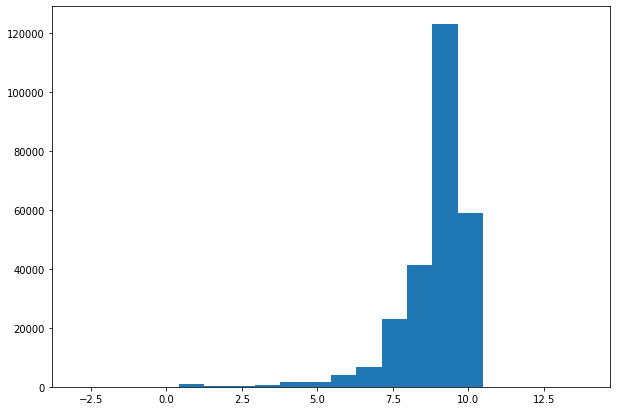

,Bit 0,Bit 1,Bit 2,Bit 3,Bit 4,Bit 5,Bit 6,Bit 7,Bit 8,Bit 9,...,Bit 1015,Bit 1016,Bit 1017,Bit 1018,Bit 1019,Bit 1020,Bit 1021,Bit 1022,Bit 1023,standard_value
1,1,1,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,4.761319
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.774952
51,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,4.646312
77,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,2.917771
105,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.459589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302210,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,9.826930
302211,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.826930
302213,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.481542
302215,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.826930


In [ ]:
# distribution of train set is approximately the same as previous distribution
plotHist(train_df['standard_value'])

In [ ]:
# export train, dev, test sets
dev_df.to_pickle('dev_df.pkl')
test_df.to_pickle('test_df.pkl')
train_df.to_pickle('train_df.pkl')